In [52]:
import sys
import getopt
import os
#from sets import Set
import json
import pprint
from graphviz import Digraph
from math import log
import src.searchtree as st
import src.utils as utils

In [53]:
#agent is the agent we are trying to compromise. We are the adversary. All other agents are the adversary.
agent=0
domain="uav-factored" #"logistics-small-factored"#"logistics-small-factored" #"uav-factored"#
problem="example" #""test2"#"probLOGISTICS-4-0"#"example" #"test"#"probLOGISTICS-4-0"

st.configuration["privateActions"]=False 
st.configuration["useFullStates"]=1
st.configuration["nTo1Mapping"]=1
st.configuration["SecureMAFS"]=False
st.configuration["debug"]=True
st.configuration["console"]=False

if st.configuration["console"]:
    #read options
    params = ["domain=","problem=","agent=","use-full-states=","n-to-1-mapping=","secure-mafs","debug"]
    #print(str(sys.argv))
    try:
        opts, args = getopt.getopt(sys.argv[1:],'',params)
        #print("opts:"+str(opts))
        #print("args:"+str(args))
    except getopt.GetoptError:
        print ('bad leakage.py params: ' + str(params))
        sys.exit(2)

    for opt, arg in opts:
        print("opt="+str(opt)+",arg="+str(arg))
        if opt == "--domain":
            domain = arg
        elif opt == "--problem":
            problem = arg
        elif opt == "--agent":
            agent = int(arg)
        elif opt == "--use-full-states":
            st.configuration["useFullStates"] = int(arg)
        elif opt == "--n-to-1-mapping":
            st.configuration["nTo1Mapping"] = int(arg)
        elif opt == "--secure-mafs":
            st.configuration["SecureMAFS"]=True
        elif opt == "--debug":
            st.configuration["debug"]=True

root="traces/"+domain+"/"+problem+"/"+str(st.configuration["nTo1Mapping"])
agentFile=root+"/agent"+str(agent)+".json"
#adversaryFile=root+"/agent"+str(adversary)+".json"

outputFile=root+"/global-searchtree"


In [54]:
#load data
varMap = {}
stateMap = {}
#states = {}
opMap = {}
operators = set()

advers = set()
states = []

plan = []

agents = 0

for fileName in os.listdir(root):
    agentID = -1
    if fileName.find("agent")!= -1 and fileName.find(".json")!= -1:
        #print("next: "+fileName[fileName.find("agent")+5:fileName.find(".json")])
        agentID=int(fileName[fileName.find("agent")+5:fileName.find(".json")])
        #print(agentID)
    if agentID != -1:
        print("processing " + fileName)
        agents += 1

        f = open(root+"/"+fileName)
        data = json.load(f)
        f.close()

        #load variables
        for v in data["variables"]:
            #print(v)
            var = st.Variable(v)
            varMap[var.hash] = var
        
        if st.configuration["debug"]:
            print("variables:")
            pprint.pprint(varMap)
            
        #load states
        order = 0
        secureMAFSStates = set()
        for s in data["states"]:
            state = st.State(s,varMap,order)
            
            stateMap[state.hash] = state
            #states[agentID].append(state)
            order += 1
            states.append(state)
            
        #states = [s for s in stateMap.values()]

        #load operators (and convert to label non-preserving projection)
        allOps = data["operators"]
        
        for op in allOps:
            #print(op)
            operator = st.Operator(op)
            if operator.hash in opMap:
                opMap[operator.hash].process(operator)
            else:
                opMap[operator.hash] = operator

        operators = operators | set(opMap.values())
        
        plan = data["plan"]
        
received = list(filter(lambda x: x.isReceived(), states))
sent = list(filter(lambda x: x.isSent() or x.isInit(), states))

        
print("done!")  
print("variables:" + str(len(varMap)))
print("operators:" + str(len(operators)))
print("states:" + str(len(states)))
print("received:" + str(len(received)))
print("sent:" + str(len(sent)))

if st.configuration["debug"]:
    print("varMap:")
    pprint.pprint(varMap)
    
    if len(states) < 25:
        print("stateMap:")
        pprint.pprint(stateMap)
        print("states:")
        pprint.pprint(states)
        
    if len(received) < 25:
        print("received:")
        pprint.pprint(received)
        
    if len(sent) < 25:
        print("sent:")
        pprint.pprint(sent)
        
    print("opMap:")
    pprint.pprint(opMap)
    print("operators:")
    pprint.pprint(operators)
    print("plan:")
    pprint.pprint(plan)
            



processing agent0.json
variables:
{'0:2': 0:2:True:{'1': '(N)base-has-supplies()', '0': '(P)base-has-supplies()'},
 'P:0': P:0:False:{'1': '(N)mission-complete()', '0': 'mission-complete()'},
 'P:1': P:1:False:{'1': '(N)uav-has-fuel()', '0': 'uav-has-fuel()'}}
processing agent1.json
variables:
{'0:2': 0:2:True:{'1': '(N)base-has-supplies()', '0': '(P)base-has-supplies()'},
 '1:2': 1:2:True:{'1': '(N)location-complete(l1)', '0': '(P)location-complete(l1)'},
 '1:3': 1:3:True:{'1': '(N)location-complete(l2)', '0': '(P)location-complete(l2)'},
 'P:0': P:0:False:{'1': '(N)mission-complete()', '0': 'mission-complete()'},
 'P:1': P:1:False:{'1': '(N)uav-has-fuel()', '0': 'uav-has-fuel()'}}
done!
variables:5
operators:8
states:16
received:6
sent:9
varMap:
{'0:2': 0:2:True:{'1': '(N)base-has-supplies()', '0': '(P)base-has-supplies()'},
 '1:2': 1:2:True:{'1': '(N)location-complete(l1)', '0': '(P)location-complete(l1)'},
 '1:3': 1:3:True:{'1': '(N)location-complete(l2)', '0': '(P)location-complet

0:2 (private=True):
   1 = (N)base-has-supplies()
   0 = (P)base-has-supplies()
1:3 (private=True):
   1 = (N)location-complete(l2)
   0 = (P)location-complete(l2)
P:1 (private=False):
   1 = (N)uav-has-fuel()
   0 = uav-has-fuel()
P:0 (private=False):
   1 = (N)mission-complete()
   0 = mission-complete()
1:2 (private=True):
   1 = (N)location-complete(l1)
   0 = (P)location-complete(l1)


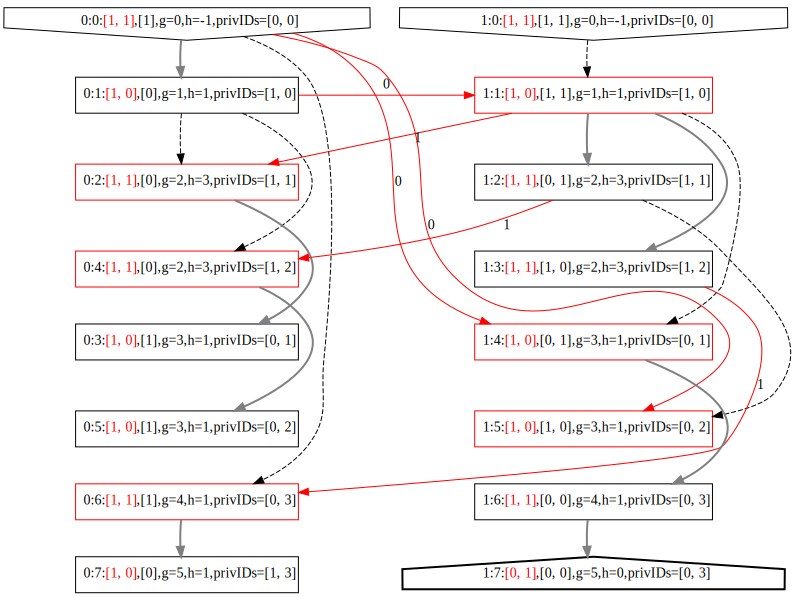

In [55]:
#show search tree in graphviz
if st.configuration["debug"]:
    from graphviz import Digraph


    def getNodeID(state):
        return str(state.agentID)+str(state.stateID)

    dot = Digraph(comment=root,engine="dot")

    with dot.subgraph(name='states') as dotS:
        #dotS.attr(rankdir='LR')
        #dotS.attr(rank='same')
        dotS.attr(ordering='out')

        x = 10
        y = 10
        for state in states:
            label = state.printStateDotLabel()

            position = str(x)+","+str(y)+"!"

            #add state, special case for initial state
            id = getNodeID(state)
            if state.heuristic == -1:
                dotS.node(id, label, shape='invhouse',pos=position)

            elif state.heuristic == 0:
                dotS.node(id, label, shape='house', style='bold',pos=position)
            else:
                if state.isReceived():
                    dotS.node(id, label, shape='box',color='red',pos=position)
                else:
                    dotS.node(id, label, shape='box',pos=position)

            y += 1
            x = 8+(x+1)%4

        prev = -1
        done = set()
        for state in states:
            if state.isReceived():
                sentStateID = state.privateIDs[state.senderID]
                sentStateHash = str(state.senderID)+":"+str(sentStateID)
                label = str(state.senderID)
                sentState = stateMap[sentStateHash]
                dotS.edge(str(sentState.agentID)+str(sentState.stateID), getNodeID(state),color='red',constraint='false',label=label)
                
                iparentID = state.privateIDs[state.agentID]
                iparentHash = str(state.agentID)+":"+str(iparentID)
                label = ""#',\n'.join(str(s) for s in ip["applicable"])
                iparent = stateMap[iparentHash]
                dotS.edge(str(iparent.agentID)+str(iparent.stateID), getNodeID(state),style='dashed',label=label,constraint='false')

                
            else:
                if state.parentID != -1:
                    dotS.edge(str(state.agentID)+str(state.parentID),getNodeID(state),style='bold',color='grey',constraint='false')
                
            #invisible link from previous state
            if prev != -1 and prev.agentID == state.agentID:
                dotS.edge(getNodeID(prev), getNodeID(state),style='invis')

            prev=state


        #print(done)




    #print variables
    for var in varMap:
        print(str(var)+" (private=" + str(varMap[var].isPrivate) + "):")
        for val in varMap[var].vals:
            print( "   " + val + " = "+ varMap[var].vals[val])

    #print(dot.source)

    dot.render(outputFile)
    
dot



In [56]:
#check global correctness

sentStateIDCorrect = True
sentStateAgentIDCorrect = True
sentStatePublicValuesCorrect = True

iparentOtherIDsMatch = True
iparentIDCorrect = True
iparentPrivateValuesCorrect = True

for state in states:
    if state.isReceived():
        sentStateID = state.privateIDs[state.senderID]
        sentStateHash = str(state.senderID)+":"+str(sentStateID)
        sentState = stateMap[sentStateHash]
        
        if state.privateIDs[state.senderID] != sentState.stateID:
            sentStateIDCorrect = False
            
        if state.privateIDs[state.agentID] != sentState.privateIDs[state.agentID]:
            sentStateAgentIDCorrect = False
            
        if state.publicValues != sentState.publicValues:
            sentStatePublicValuesCorrect = False
            
        
        iparentID = state.privateIDs[state.agentID]
        iparentHash = str(state.agentID)+":"+str(iparentID)
        iparent = stateMap[iparentHash]
        
        #this does not work as the values might have been changed by multiple agents before receiving the state
#         for a in range(0,agents):
#             if a != state.agentID and a != sentState.agentID and state.privateIDs[a] != iparent.privateIDs[a]:
#                 iparentOtherIDsMatch = False
#                 print("iparentOtherIDsMatch, agent=" + str(a))
#                 print(state)
#                 print(iparent)
                
        if state.privateIDs[state.agentID] != iparent.stateID:
            iparentIDCorrect = False
            
        if state.privateValues != iparent.privateValues:
            iparentPrivateValuesCorrect = False
            print("iparentPrivateValuesCorrect:" + str(state.privateValues) + " != " + str(iparent.privateValues))
            print(state)
            print(iparent)
            
outputCSVFile = "./global_view_test.csv"
            
import csv   
from pathlib import Path

columns=[
    'domain',
    'problem',
    'agents',
    'privateActions',
    'useFullStates',
    'nTo1Mapping',
    'SecureMAFS',
    'sentStateIDCorrect',
    'sentStateAgentIDCorrect',
    'sentStatePublicValuesCorrect',
    'iparentOtherIDsMatch',
    'iparentIDCorrect',
    'iparentPrivateValuesCorrect'
]

outCSV = Path(outputCSVFile)
exists = outCSV.is_file()

row = [
    domain,
    problem,
    agents,
    st.configuration["privateActions"],
    st.configuration["useFullStates"],
    st.configuration["nTo1Mapping"],
    st.configuration["SecureMAFS"],
    sentStateIDCorrect,
    sentStateAgentIDCorrect,
    sentStatePublicValuesCorrect,
    iparentOtherIDsMatch,
    iparentIDCorrect,
    iparentPrivateValuesCorrect
]

with open(outputCSVFile, 'a') as f:
    writer = csv.writer(f)
    if not exists:
        writer.writerow(columns)
    writer.writerow(row)
   

iparentPrivateValuesCorrect:[0, 1] != [1, 1]
1:4:[1, 0],[0, 1],[0, 1]
1:1:[1, 0],[1, 1],[1, 0]
iparentPrivateValuesCorrect:[1, 0] != [0, 1]
1:5:[1, 0],[1, 0],[0, 2]
1:2:[1, 1],[0, 1],[1, 1]
